### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

### runs and overview
see https://www.notion.so/hosing-experiment-5833649ed7784b57b65b8c69f49d2f11

SR - sal rest

model | desc |
-- | -- |
R4B0 | SR no hos |
RWB0 | no SR |
R4BH | SR, hosing |
RWBH | no SR, hosing |

In [9]:
regdict = {
            'R4B0' : {'color' : 'b', 'linestyle' :'-', 'desc' :'SR, no hos'},
           'RWB0' : {'color' : 'b', 'linestyle' :':', 'desc' :'no SR, no hos'},
          'R4BH' : {'color': 'r', 'linestyle' :'-', 'desc' :'SR, yes hos'},
           'RWBH' : {'color': 'r', 'linestyle' :':', 'desc' :'SR, yes hos'},
           }

Text(-45, 55, 'NAH')

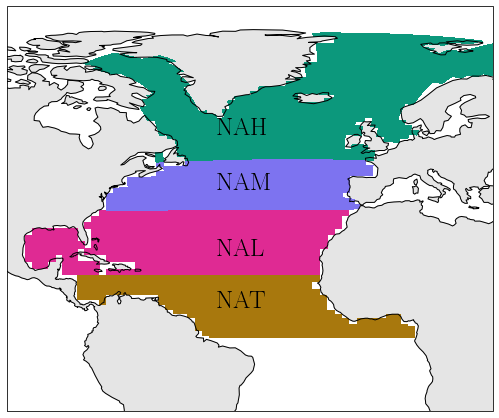

In [5]:
atl = xr.open_dataset('/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/meshmask_with_Atl.nc')

    
regs = ['NAT', 'NAL', 'NAM', 'NAH']#, 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'NAT' : {'number' : 1},
           'NAL' : {'number': 2},
          'NAM' : {'number': 3},
           'NAH' : {'number': 4},
           
          }

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[atl[regs[i]][0,0,:,:] == 1] = regdict[regs[i]]['number']
maskno[maskno == 0] = np.nan

fact = 0.6
tfig = plt.figure(figsize=[14.5*fact, 14.5*fact])
ax = plt.axes(projection=ccrs.PlateCarree())

year = 1984
tgrid = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_RVA0/ORCA2_1m_{year}0101_{year}1231_ptrc_T.nc')

nav_lon = tgrid['nav_lon'].values
nav_lat = tgrid['nav_lat'].values
mesh = ax.pcolormesh(nav_lon, nav_lat, maskno, transform=ccrs.PlateCarree(), cmap=cm.phase, zorder =0, alpha = 1,\
                    vmin = 1, vmax = 5)

ax.coastlines(zorder = 1 )
#lons, lats extent
ax.set_extent([ -102, 30, -20, 120,], crs=ccrs.PlateCarree())

ax.add_feature(cp.feature.LAND, color='grey', alpha = 0.2)

ax.text(-45, 8, s = f'NAT', color='k', \
        fontsize = 25, fontweight = 'bold', transform=ccrs.Geodetic())
ax.text(-45, 22, s = f'NAL', color='k', \
        fontsize = 25, fontweight = 'bold', transform=ccrs.Geodetic())
ax.text(-45, 40, s = f'NAM', color='k', \
        fontsize = 25, fontweight = 'bold', transform=ccrs.Geodetic())
ax.text(-45, 55, s = f'NAH', color='k', \
        fontsize = 25, fontweight = 'bold', transform=ccrs.Geodetic())

### first, extract time series

    'made in':'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/extract/natl_bio.py',
    'made in':'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/extract/natl_diad.py',

In [23]:
def make_yearlist(yrst, yrend, dtype, mod = 'RVA0'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/{mod}_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


# model | desc |
# -- | -- |
# R4B0 | SR no hos |
# RWB0 | no SR |
# R4BH | SR, hosing |
# RWBH | no SR, hosing |

st = 1940
en = 2020

diad_R4B0 = xr.open_mfdataset(make_yearlist(st,en,'diad', 'R4B0'))
diad_RWB0 = xr.open_mfdataset(make_yearlist(st,en,'diad', 'RWB0'))
#diad_R4BH = xr.open_mfdataset(make_yearlist(st,en,'diad', 'R4BH'))
diad_RWBH = xr.open_mfdataset(make_yearlist(st,en,'diad', 'RWBH'))


## open diad and ptrc ts

# "DIA", "MIX", "COC", "PIC", "PHA", "FIX",
## plot surface 100m DIC, NO3, Si, Fer, Phy, Diatom proportion 

In [20]:
diad_R4B0

<xarray.Dataset>
Dimensions:       (deptht: 31, prov: 5, time_counter: 252, var: 3, varf: 4)
Coordinates:
  * var           (var) object 'EXP' 'PPT' 'TChl'
  * varf          (varf) object 'Cflx' 'dpCO2' 'pCO2' 'PPINT'
  * time_counter  (time_counter) datetime64[ns] 1940-01-01 ... 1960-12-01
  * deptht        (deptht) float32 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
  * prov          (prov) object 'ATL' 'NAT' 'NAL' 'NAM' 'NAH'
Data variables:
    regmean       (var, time_counter, deptht, prov) float64 dask.array<chunksize=(3, 12, 31, 5), meta=np.ndarray>
    regmeanf      (varf, time_counter, prov) float64 dask.array<chunksize=(4, 12, 5), meta=np.ndarray>
Attributes:
    made in:  /gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/extract/natl_dia...
    desc:

In [29]:
def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        
    return max_atl

R4B0_moc = make_yearlist(1940, 2023, 'TOM12_TJ_R4B0')
RWB0_moc = make_yearlist(1940, 2023, 'TOM12_TJ_RWB0')
RWBH_moc = make_yearlist(1940, 2023, 'TOM12_TJ_RWBH')
#R4BH_moc = make_yearlist(1959, 2023, 'TOM12_TJ_R4BH')

R4B0_mocdat = xr.open_mfdataset(R4B0_moc) 
RWB0_mocdat = xr.open_mfdataset(RWB0_moc) 
RWBH_mocdat = xr.open_mfdataset(RWBH_moc) 
nicetime  = R4B0_mocdat.indexes['time_counter'].to_datetimeindex()

#R4BH_mocdat = xr.open_mfdataset(R4BH_moc) 

R4B0_max_amoc = get_max_amoc(R4B0_mocdat)
RWB0_max_amoc = get_max_amoc(RWB0_mocdat)
RWBH_max_amoc = get_max_amoc(RWBH_mocdat)
#R4BH_max_amoc = get_max_amoc(R4BH_mocdat)




In [30]:
data_vars = {'amoc':(['time_counter'], R4B0_max_amoc,),}
coords = {'time_counter': (['time_counter'], nicetime)}
R4B0_max = xr.Dataset(data_vars=data_vars,coords=coords)

data_vars = {'amoc':(['time_counter'], RWB0_max_amoc,),}
RWB0_max = xr.Dataset(data_vars=data_vars,coords=coords)

data_vars = {'amoc':(['time_counter'], RWBH_max_amoc,),}
RWBH_max = xr.Dataset(data_vars=data_vars,coords=coords)

# data_vars = {'amoc':(['time_counter'], R4BH_max_amoc,),}
# R4BH_max = xr.Dataset(data_vars=data_vars,coords=coords)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


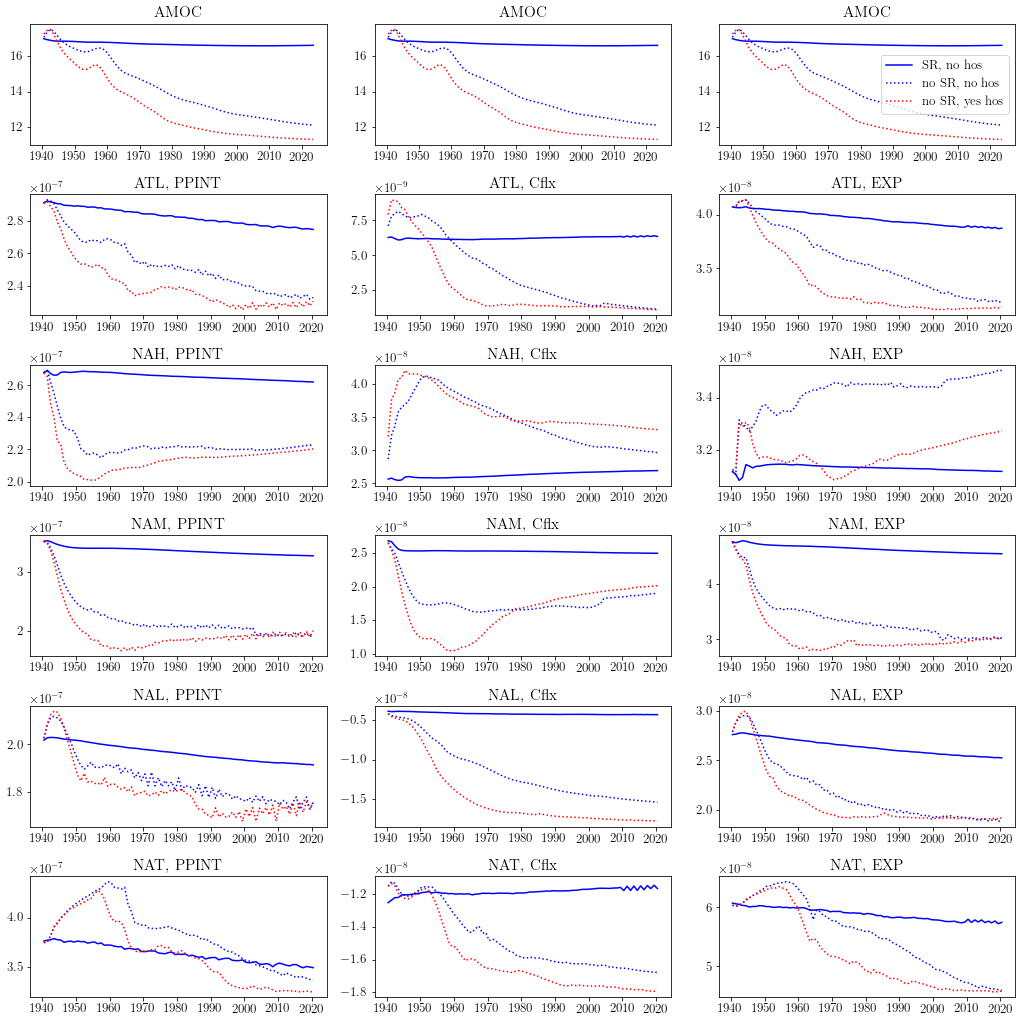

In [34]:
regdict = {
            'R4B0' : {'color' : 'b', 'linestyle' :'-', 'desc' :'SR, no hos'},
           'RWB0' : {'color' : 'b', 'linestyle' :':', 'desc' :'no SR, no hos'},
           'RWBH' : {'color': 'r', 'linestyle' :':', 'desc' :'no SR, yes hos'},
            'R4BH' : {'color': 'r', 'linestyle' :'-', 'desc' :'SR, yes hos'},
           }

#diad_R4B0.varf

regs = ['ATL', 'NAH','NAM','NAL', 'NAT',]
pls = ['R4B0','RWB0','RWBH']
pls_diad = [diad_R4B0,diad_RWB0,diad_RWBH]
pls_amoc = [R4B0_max, RWB0_max, RWBH_max]

fact = 1.2
fig, axs = plt.subplots(6,3, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,3):
    for p in range(0,3):
        ind = i
        tp = pls[p]
        tpp = pls_amoc[p]
        DIC = tpp
        axs[ind].plot(DIC.time_counter.groupby('time_counter.year').mean(), \
                     DIC.amoc.groupby('time_counter.year').mean(), linestyle = regdict[tp]['linestyle'],\
                        color = regdict[tp]['color'], label = regdict[tp]['desc'])
        axs[2].legend(loc = 'best')
        axs[i].set_title(f'AMOC')
for i in range(1,6):
    for p in range(0,3):
        ind = 3*i
        tp = pls[p]
        tpp = pls_diad[p]
        DIC = tpp.sel(varf = 'PPINT').sel(prov = regs[i-1])
        axs[ind].plot(DIC.time_counter.groupby('time_counter.year').mean(), \
                     DIC.regmeanf.groupby('time_counter.year').mean(), linestyle = regdict[tp]['linestyle'],\
                        color = regdict[tp]['color'], label = regdict[tp]['desc'])
        axs[ind].set_title(f'{regs[i-1]}, PPINT')
        DIC = tpp.sel(varf = 'Cflx').sel(prov = regs[i-1])
        axs[ind+1].plot(DIC.time_counter.groupby('time_counter.year').mean(), \
                     DIC.regmeanf.groupby('time_counter.year').mean(), linestyle = regdict[tp]['linestyle'],\
                        color = regdict[tp]['color'], label = regdict[tp]['desc'])
        axs[ind+1].set_title(f'{regs[i-1]}, Cflx')
        
        DIC = tpp.sel(var = 'EXP').isel(deptht = 9).sel(prov = regs[i-1])
        axs[ind+2].plot(DIC.time_counter.groupby('time_counter.year').mean(), \
                 DIC.regmean.groupby('time_counter.year').mean(), linestyle = regdict[tp]['linestyle'],\
                        color = regdict[tp]['color'], label = regdict[tp]['desc'])
        axs[ind+2].set_title(f'{regs[i-1]}, EXP')

        
plt.tight_layout()

In [ ]:
# regdict = {'NAT' : {'color' : '#9A6324'},
#            'NAL' : {'color': '#3cb44b'},
#           'NAM' : {'color': '#469990'},
#            'NAH' : {'color': '#4363d8'},
#            'ATL' : {'color': 'r'},}